<p style="text-align:center">
PSY 341K <b>Python Coding for Psychological Sciences</b>, Fall 2019

<img src="https://github.com/sathayas/JupyterPythonFall2019/blob/master/Images/PythonLogo.png?raw=true" alt="Python logo" width="400">
</p>

<p style='text-align:center; font-size:40px; margin-bottom: 30px;'><b> Classification </b></p>

<p style='text-align:center; font-size:18px; margin-bottom: 32px;'><b> November 19 - 26, 2019 </b></p>

<hr style='height:5px;border:none' />

# 0. What is classification?
<hr style="height:1px;border:none" />

As you recall, the goal of clustering is to split observations in a data set into clusters with similar features. The goal of **classification**, on the other hand, is to predict which group, or a **class**, a particular observation belongs to based on its features. The predictive model for classification, often referred as a **classifier**, is trained on a data set with features and *known labels*. There are different types of classification methods. We will learn some of those in the next few classes.

# 1. k-nearest neighbors (KNN) classification
<hr style="height:1px;border:none" />

## Majority vote

Now, let's think a simple **classification** problem. Say there are two classes of data points. And you have a new observation to be classified into one of the two classes. 

[`<kNN_2Clusters.py>`](https://github.com/sathayas/PythonClassFall2019/blob/master/classExamples/kNN_2Clusters.py)

In [1]:
%matplotlib inline

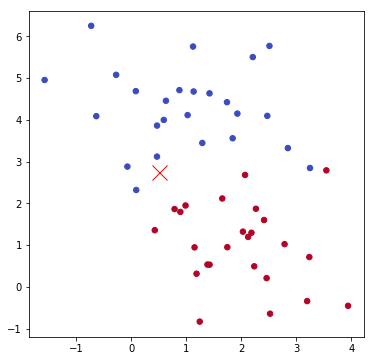

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import KNeighborsClassifier


# producing a toy data set: two clusters, separated
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=1.0)


# plotting the toy data plus a new observation
x_new = 0.5
y_new = 2.75
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.plot(x_new, y_new, marker='x', c='r', ms=15)
plt.show()

See the new observation (red X). Should this be classified as blue or red? We can classify based on the observations around it.

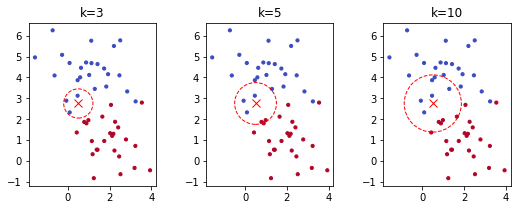

In [4]:
# k nearest neighbors
plt.figure(figsize=[9,3])
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=0.7, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=3')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=1.0, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=5')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=1.37, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=10')

plt.show()

These plots show circles encompassing $k$ ($k=3$, $5$, and $10$) nearest neighbors of the new observation. We can classify the new observation as the most abundant class in each of the circles. In this case,
  * $k=3$: Blue=3 $\rightarrow$ Classified as Blue
  * $k=5$: Blue=3, Red=2 $\rightarrow$ Classified as Blue
  * $k=10$: Blue=6, Red=4 $\rightarrow$ Classified as Blue

As you can see, voting among $k$ nearest neighbors enables classification of a new observation without an explicit model. This classification method is known as the **k nearest neighbor** **(kNN** or **KNN)** method. 

The k nearest neighbor method is implemented as the **`KNeighborsClassifier`** transformation object in **`sklearn.neighbors`**. Here is an example.

In [3]:
# k nearest neighbor classifier object
kNN5 = KNeighborsClassifier(5, weights='uniform')
kNN5.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

The first parameter of `KNeighborsClassifier` is **`k`**, the number of nearest neighbors to be considered. The parameter **`weights='uniform'`** indicates that all k neighbors count equally in the voting process for classification. This is a **supervised learning** method, so we need to provide both the feature data as well as the target information in the **`.fit()`** method. The `.fit()` method implements the actual learning process from the data to generate a **classifier**, an object that can classify group assignments (or labels) based in input features.

Just for fun, let's plot the decision boundary in this case, showing the boundary between one class vs another, plotted in a 2D space. I have written some custom functions in a file [**`DecisionBoundary.py`**](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/DecisionBoundary.py) for that purpose. We can use one of these functions, `plot_contours`, by 
```python
from DecisionBoundary import plot_contours
```
(no `.py` is necessary).

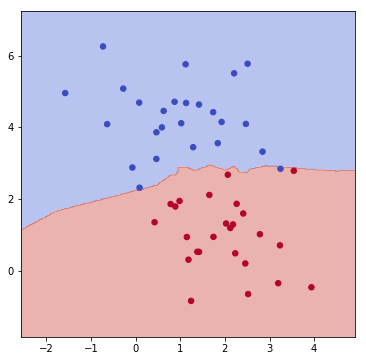

In [6]:
# decision boundary
from DecisionBoundary import plot_contours

plt.figure(figsize=[6,6])
ax = plt.subplot(111)
plot_contours(ax, kNN5, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.show()

The choice of k influences the decision boundary. Here are examples with different values of k.

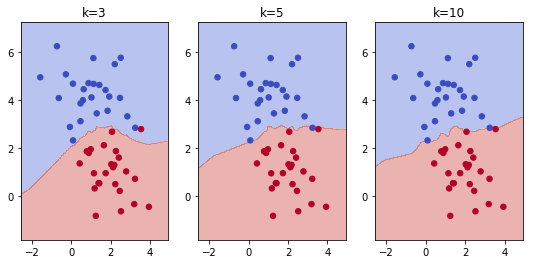

In [7]:
# k nearest neighbor classifier object with different k
kNN3 = KNeighborsClassifier(3, weights='uniform')
kNN3.fit(X,y)

kNN10 = KNeighborsClassifier(10, weights='uniform')
kNN10.fit(X,y)


# decision boundary
plt.figure(figsize=[9,4])
ax = plt.subplot(131)
plot_contours(ax, kNN3, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=3')

ax = plt.subplot(132)
plot_contours(ax, kNN5, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=5')

ax = plt.subplot(133)
plot_contours(ax, kNN10, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=10')

plt.show()

The larger the parameter k is, the smoother the decision boundary becomes. A small k may lead to a problem known as **over-fitting**, where the classifier works very well only for the given training data, and may not be generalized to other data.

## Ties

Depending on the number of classes, the choice of certain values of k may lead to ties, or the number of equal votes in more than one class in a neighborhood. For example, in a 2-class classification problem, if k is an even number, then the number of votes for each class may be k/2 and cannot conclude which class is more appropriate. If such ties happen, then there is no definitive answer as to how the predicted class is chosen.  Here is the warning from the `sklearn` documentation:

>**Warning** Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor k+1 and k, have identical distances but different labels, the results will depend on the ordering of the training data. 

So a choice of k with potential ties should be avoided.
  * For a 2-class classification, k should not be an even number
  * For a classification into p classes, k should not be a multiple of p.
     * **e.g.**, 3-class classification, then k shouldn't be 3, 6, 9 , 12, ..

## Weighted by the distance

One way to avoid the problem with ties is to give more weights to votes that are closer to the new observation. In other words, k votes are no longer counted as equals, but those closer to the new observation should account more, and vice versa. This can be implemented by setting the parameter **`weights='distance'`** in `KNeighborsClassifier`. However, the use of the distance information may lead to over-fitting. Here are examples of k neighbor classifiers on the same data, but this time with `weights='distance'` in stead of `uniform`.

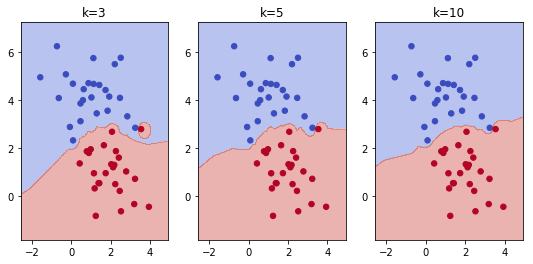

In [8]:
# k nearest neighbor classifier object with different k
# now weighted by the distance
kNN3dist = KNeighborsClassifier(3, weights='distance')
kNN3dist.fit(X,y)

kNN5dist = KNeighborsClassifier(5, weights='distance')
kNN5dist.fit(X,y)

kNN10dist = KNeighborsClassifier(10, weights='distance')
kNN10dist.fit(X,y)


# decision boundary
plt.figure(figsize=[9,4])
ax = plt.subplot(131)
plot_contours(ax, kNN3dist, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=3')

ax = plt.subplot(132)
plot_contours(ax, kNN5dist, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=5')

ax = plt.subplot(133)
plot_contours(ax, kNN10dist, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=10')

plt.show()

You can see that the boundary curves around a few observations near the boundary.

# 8. KNN Example: iris data
<hr style="height:1px;border:none" />

Here, we apply the kNN method to the iris data. We will focus on ***two features (sepal length and petal width)***. But before doing that here are some things to consider.

### Balance between classes

It is important that the numbers of data points belonging to different classes are **balanced**. If classes were unbalanced (i.e., one class is more represented than the others), then your classifier might classify all observation into the most dominant class. For example, if there were 900 Setosas, 50 Versicolours, and 50 Virginicas, then a classifier could achieve close to 90% accuracy by classifying all observations as Setosas!

### Training and testing data sets

When you have a classifier, and want to examine how accurately it can classify, it is a good idea to have two separate data sets: training data and testing data. Both the features and the target labels from the training data set are used to generate a classifier. Then the feature information (but not target labels!) from the testing data is fit to the classifier, in order to examine how accurately it can classify, or predict the class labels. For this particular example, we will use 90 observations (or 60% of data) as the training data set, and the remaining 60 observations (or 40% of data) as the testing data set.

Now let's learn a KNN classifier for the iris data. First we load the necessary libraries and the data.

[`<IrisKNN.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisKNN.py)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from DecisionBoundary import plot_contours   # plotting decison boundary


# Loading the iris data
iris = datasets.load_iris()
X = iris.data[:,[0,3]]  # sepal length and petal width only
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

Now the *training* and *testing* data. There is a function called **`train_test_split`** under **`sklearn.model_selection`**. This function randomly split a data set into training and testing data sets. You can specify the proportion of the data to be saved later as the testing data (**`test_size`** parameter). In this example, we will use 40% (`test_size=0.4`) as the testing data. 

In [2]:
# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=2018)

Here, the features **`X`** and the labels **`y`** have been split into the training data (**`X_train`** (features) and **`y_train`** (labels)) and the testing data (**`X_test`** and **`y_test`**). We can also supply the **`random_state`** parameter with a number; this initializes a random number generator. If you set the `random_state` parameter the same, you can regenerate the same random numbers (thus the same training and testing data sets).

Now let's train the classifier. Here, we use `k=5` and `k=20`, as well as `weights='uniform'` and `weights='distance'` in our kNN classifiers.

In [5]:
# k nearest neighbor classifier objects
kNN5uni = KNeighborsClassifier(5, weights='uniform')
kNN5uni.fit(X_train,y_train)

kNN5dist = KNeighborsClassifier(5, weights='distance')
kNN5dist.fit(X_train,y_train)

kNN20uni = KNeighborsClassifier(20, weights='uniform')
kNN20uni.fit(X_train,y_train)

kNN20dist = KNeighborsClassifier(20, weights='distance')
kNN20dist.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')

And we predict labels for the testing data. In this case, we only supply the features in the **`.predict()`** method associated with each classifier.

In [6]:
# Predicted classes
y_pred_5uni = kNN5uni.predict(X_test)
y_pred_5dist = kNN5dist.predict(X_test)
y_pred_20uni = kNN20uni.predict(X_test)
y_pred_20dist = kNN20dist.predict(X_test)

We can see the resulting decision boundaries, with testing data overlaid.

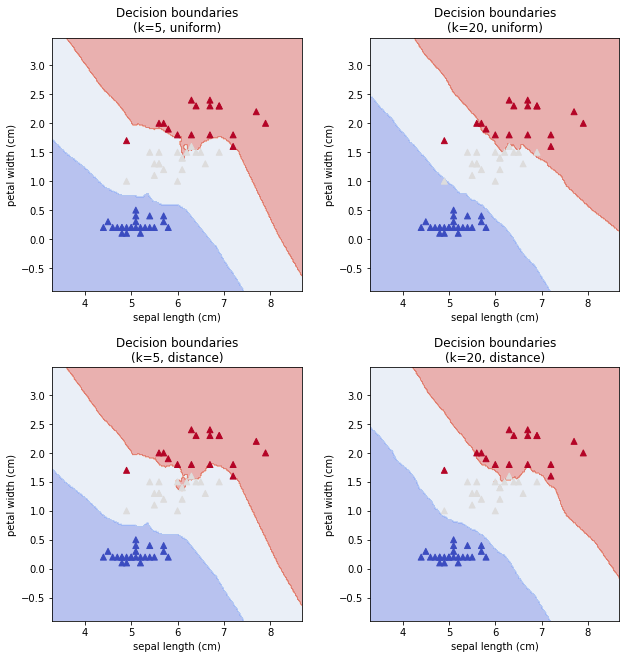

In [7]:
# plotting the boundaries and the testing data
plt.figure(figsize=[9,9])
ax = plt.subplot(221)
plot_contours(ax, kNN5uni, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries\n(k=5, uniform)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(222)
plot_contours(ax, kNN20uni, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries\n(k=20, uniform)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(223)
plot_contours(ax, kNN5dist, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries\n(k=5, distance)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(224)
plot_contours(ax, kNN20dist, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries\n(k=20, distance)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

plt.subplots_adjust(hspace=0.3, wspace=0.275,
                    bottom=0.05, top=0.95, left=0.10, right=0.975)
plt.show()


## Assessing the classification performance

We can examine the classification results more closely. A good tool to examine classification results is a **confusion matrix**. In this matrix, the rows represent true class labels, and the columns represent different classes in the predicted classes from the testing data. If everything is classified accurately, then all observations are tallied on the main diagonal. Any off-diagonal elements are mis-classified observations. The confusion matrix allows us to examine in which categories observations are incorrectly classified. 

There is a function called **`confusion_matrix`** under **`sklearn.metrics`**. You just need to provide the target labels (the first input argument) and predicted labels (the second input argument). 

In [8]:
# classifier performance
print('K=5, uniform\n', confusion_matrix(y_test,y_pred_5uni))
print('\nK=5, distance\n', confusion_matrix(y_test,y_pred_5dist))
print('\nK=20, uniform\n', confusion_matrix(y_test,y_pred_20uni))
print('\nK=20, distance\n', confusion_matrix(y_test,y_pred_20dist))

K=5, uniform
 [[24  0  0]
 [ 0 17  2]
 [ 0  3 14]]

K=5, distance
 [[24  0  0]
 [ 0 14  5]
 [ 0  2 15]]

K=20, uniform
 [[24  0  0]
 [ 1 17  1]
 [ 0  2 15]]

K=20, distance
 [[24  0  0]
 [ 0 15  4]
 [ 0  1 16]]


Here, we see that all Setosas (first row / first column) are classified correctly. However, one Versicolor (second row) was classified as Virginica (third column). **`k=20, uniform`** seems to perform well in this scenario.

There is also a function called **`classification_report`** under **`sklearn.metrics`**. This function calculates various metrics of classification performance under different classes. Like the `confusion_matrix` function, you provide the target labels (the first input argument) and predicted labels (the second input argument). You can also provide the target names as the parameter **`target_names`**. Here, we focus on `k=20` and `uniform`.

In [9]:
print(classification_report(y_test, y_pred_20uni,
                            target_names=target_names))

              precision    recall  f1-score   support

      setosa       0.96      1.00      0.98        24
  versicolor       0.89      0.89      0.89        19
   virginica       0.94      0.88      0.91        17

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



Here, 
  * **precision** refers to the ratio of the true positives (tp) to the sum of true positives (tp) and false positives (fp). i.e., tp/(tp+fp). In other words, the proportion of true positives among all positives discovered by the classifier.
  * **recall** refers to the ratio of the true positives (tp) to the sum of the true positives (tp) and false negatives (fn). i.e., tp/(tp+fn). In other words, the proportion of all positives discovered by the classifier among all the positives that should have been discovered by the classifier. Also known as *sensitivity* in statistics lingo.
  * **support** refers to the number of observations in that class. 

# 9. Classification: support vector machine (SVM)
<hr style="height:1px;border:none" />

## The line must be drawn here

Let's say, you have two clusters of data points that are separated from each other. 

[`<SVM_2Clusters.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/SVM_2Clusters.py)

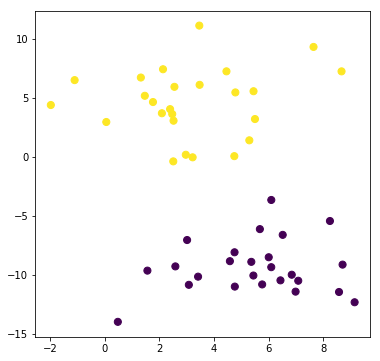

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# producing a toy data set: two clusters, separated
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=10, cluster_std=2.5)


# plotting the toy data
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()

Now, you want to draw a boundary between the two clusters, so that any future observations can be classified by which side of the boundary they lie. You can draw many possible boundaries, for example.

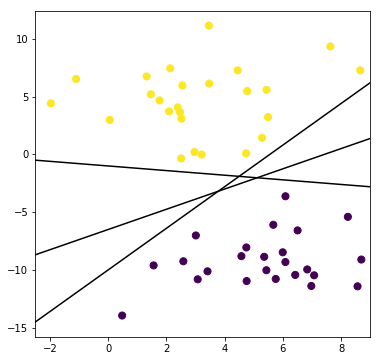

In [11]:
# plotting possible boundaries
xMin = -2.5
xMax = 9.0
xfit = np.linspace(xMin, xMax)
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
for m, b in [(0.875, -6.5), (-0.2, -1), (1.8, -10)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(xMin, xMax)
plt.show()

Now, which one is the most appropriate in this case? We can use a criterion that the boundary must separate the two clusters the most. In other words, the distance between the observations and the boundary must be maximized.

In our example, let's examine the distance between the boundary and the data point closest to the boundary, known as the **margin**.

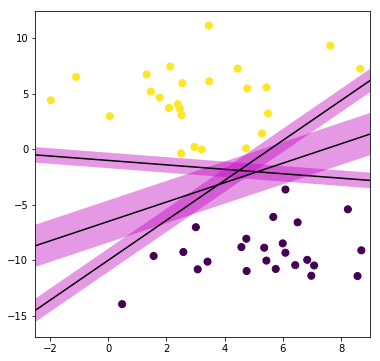

In [12]:
# plotting possible boundaries with margins
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
for m, b, d in [(0.875, -6.5, 1.9), (-0.2, -1, 0.7), (1.8, -10, 1.05)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, 'k-')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='m', alpha=0.4)
plt.xlim(xMin, xMax)
plt.show()

As you notice, the margin is different between the different boundaries. The goal of the **support vector machine** **(SVM)** algorithm is to find the boundary that maximizes the margin.

## SVM, a simple example

The SVM algorithm is implemented in **`sklearn.svm`** as the **`SVC`** transformation object. Here is how we can use the `SVC` object.

In [13]:
# SVM
sv = SVC(kernel='linear', C=10000)
sv.fit(X,y)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Here, we define the `SVC` object with two parameters. The parameter **`kernel='linear'`** defines that the boundary is a line (thus *linear*). The parameter **`C=10000`** defines the penalty for the error term. We will explore this `C` parameter later. Once the `SVC` object is defined, then we use the **`.fit`** method to fit the data (features and targets) to run the SVM algorithm. Here is the result.

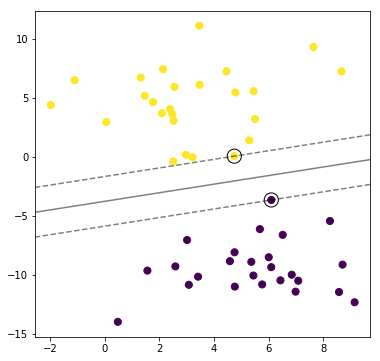

In [14]:
# plotting the descision boundary with SVM, with margins
# as well as support vectors
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

# suppor for the meshgrid
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = sv.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(sv.support_vectors_[:, 0], sv.support_vectors_[:, 1], s=200,
           linewidth=1, edgecolors='k', facecolors='none')

plt.show()

Here, the line indicates the boundary, and the dotted lines indicate the margin. The closest points on both sides of the boundary are circled. These points are called **support vectors** (SV) (the namesake of the SVM algorithm). These boundaries are pivotal in defining the boundary. In fact, these are the only points needed to define the boundary.

You can examine the coordinates of these support vectors by the **`.support_vectors_`** of the SVM object. The coordinate for the first SV is

In [15]:
# coordinate for the first SV
print(sv.support_vectors_[0,:])

[ 6.09158828 -3.62254269]


It looks like this SV belongs to the purple cluster. The coordinate for the second SV is

In [16]:
# coordinate for the second SV
print(sv.support_vectors_[1,:])

[4.74046126 0.08979735]


And this belongs to the yellow cluster.

## SVM classifier

Of course, the point of finding the boundary is so that we can use it to classify observations. To demonstrate, we split the toy data into a training and testing data sets. The testing data contains 10 observations (as specified by **`test_size=10`**).

In [17]:
# split the toy data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=10, 
                                                    random_state=0)

Now let's run SVM on the training data. As you have seen before, you can use the **`.predict`** method with the testing data to produce predicted class labels.

In [18]:
# SVM fitting
sv_train = SVC(kernel='linear', C=10000)
sv_train.fit(X_train,y_train)

# SVM classifier
y_pred = sv_train.predict(X_test)

And finally, let's see the classification results.

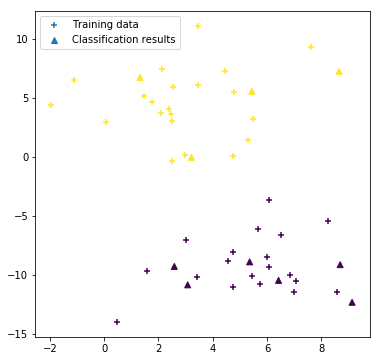

In [19]:
# plotting the training data and classification outcome
plt.figure(figsize=[6,6])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='+',
            label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='^',
            label='Classification results')
plt.legend()
plt.show()

Since these are well-separated clusters, we had a pretty good classification outcome.

## Hard and soft margins

Now let's consider a case where two clusters are not clearly separated, but have some overlap.

[`<SVM_SoftMargins.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/SVM_SoftMargins.py)

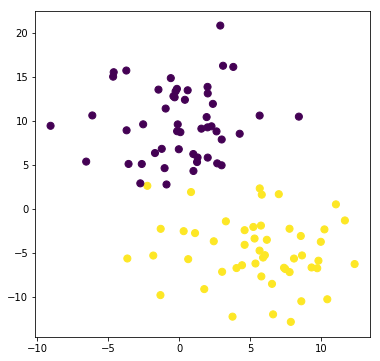

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from DecisionBoundary import plot_svm_margin

# producing a toy data set: two clusters, with some overlap
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=23, cluster_std=3.75)


# plotting the toy data
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()

(Here, don't worry about the function `plot_svm_margin`; it is a custom function in `DecisionBoundary.py`) As you can see, the two clusters are touching a little bit. In a case like this, a simple line cannot separate the two clusters without some misclassification. The parameter **`C`** mentioned earlier controls how much such misclassification you allow. In other words, how many observations may lie within the classification margin. A large value of **`C`** permits fewer observations in the margin (referred as a **hard margin**), whereas a smaller value of `C` allows many observations to lie within the margin (referred as a **soft margin**). In other words, `C` controls how hard or soft the margin is. Here are examples of SVM with different values of `C` (large:**`C=10`**, medium:**`C=1.0`**(default in SVC), small:**`C=0.1`**, and tiny:**`C=0.01`**).

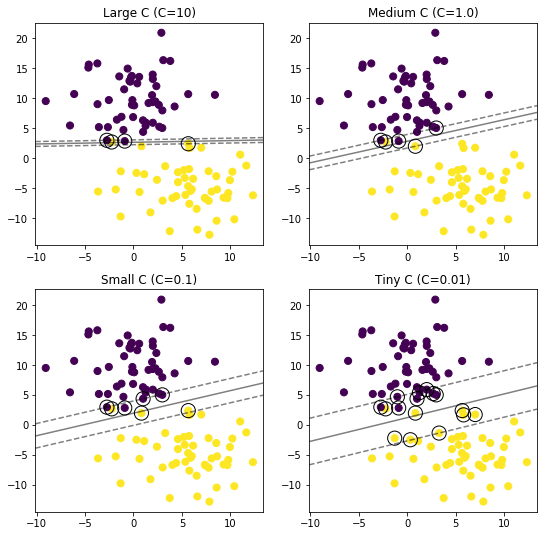

In [3]:
# SVM
plt.figure(figsize=[9,9])

svL = SVC(kernel='linear', C=10)  # large C (C=10)
svL.fit(X,y)
plt.subplot(221)
plot_svm_margin(X,y,svL)
plt.title('Large C (C=10)')

svM = SVC(kernel='linear', C=1.0)  # medium C (C=1.0)
svM.fit(X,y)
plt.subplot(222)
plot_svm_margin(X,y,svM)
plt.title('Medium C (C=1.0)')

svS = SVC(kernel='linear', C=0.1)  # small C (C=0.1)
svS.fit(X,y)
plt.subplot(223)
plot_svm_margin(X,y,svS)
plt.title('Small C (C=0.1)')

svT = SVC(kernel='linear', C=0.01)  # tiny C (C=0.01)
svT.fit(X,y)
plt.subplot(224)
plot_svm_margin(X,y,svT)
plt.title('Tiny C (C=0.01)')

plt.show()

As you can see, the larger the parameter `C`, the fewer the number of support vectors lying within the margin. And vice versa. 

So, how do we determine the value of `C` that works for your data? We do so by fitting different training data sets repeatedly and evaluate the classifier performance, the process known as *cross validation*. We will cover cross validation later.

# 10. SVM example: iris data
<hr style="height:1px;border:none" />

## Multi-class SVM

The concept of SVM makes sense for a binary classification problem. But what if there are more than 2 classes in the target? In that case, we can take two approaches:

  * **One-versus-rest (OVR)**: In this approach, each class is compared to the rest of classes in a separate SVM. Then the predicted class label is based on the class that gives the largest distance from the boundary. 
  * **One-versus-one (OVO)**: In this approach, all possible pairs of classes are compared with a 2-class SVM. For each observation, we count the number of times that observation has been classified to a particular class. The class with the most *vote* is selected as the predicted class.
  
By default, `SVC` uses the OVR approach, so we will use it for our next example.


## Example: iris data

As you recall, there are 3 classes in the iris data. While one of the classes (Setosa) is separated well from the other classes, the remaining two classes are somewhat overlapping.

[`<IrisSVM.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisSVM.py)

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Loading the iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

We will be using 100 observations as the training data, and the remaining 50 as the testing data.

In [5]:
# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=50, 
                                                    random_state=0)

Will fit the training data with `C=0.1`, allowing softer margins.

In [6]:
# SVM model fitting
sv = SVC(kernel='linear', C=0.1)
sv.fit(X_train,y_train)

# SVM classifier
y_pred = sv.predict(X_test)   # predicted class


Let's take a look at the classification results.

In [7]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]


In [8]:
# classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



So it did a good job.

# 11. Kernel methods
<hr style="height:1px;border:none" />

## Boundaries that are not straight

The SVMs we have seen so far work well if boundaries are defined as straight lines. But let's consider this case.

[`<SVM_Circles.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/SVM_Circles.py)

In [1]:
%matplotlib inline

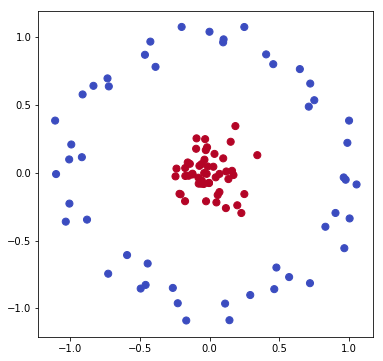

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles
from sklearn.svm import SVC
from DecisionBoundary import plot_svm_margin



# Creating a toy data with circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=88)

# plotting the data
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.coolwarm)
plt.show()


Here, the clusters can be separated by a straight line anymore. What can we do?

Let's calculate a new feature **`r`** defined as the distance of each observation from the origin (0,0). In other words,

In [3]:
# calculating the radius
r = np.sum(X**2, axis=1)**0.5

Then we replace the second feature (plotted on the y-axis) with this `r`.

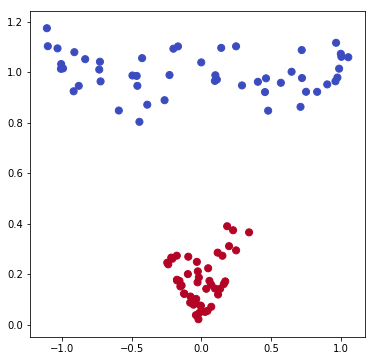

In [4]:
# plotting the data, y-axis replaced with the radius
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], r, c=y, s=50, cmap=plt.cm.coolwarm)
plt.show()

Now you can separate the two clusters by a line. So, we can perform an SVM on this transformed data.

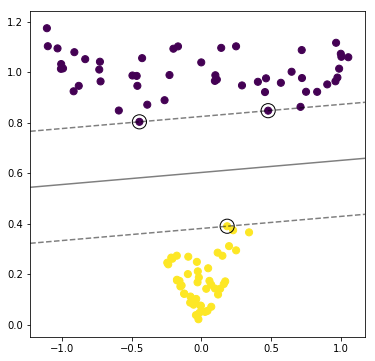

In [5]:
# SVM
R = np.vstack([X[:, 0], r]).T
sv = SVC(kernel='linear', C=10000)
sv.fit(R,y)


# plotting the margin on the SVM of the transformed data
plt.figure(figsize=[6,6])
plot_svm_margin(R,y,sv)
plt.show()

The downside of this approach is that you have to transform a feature manually. The resulting boundary also needs to be inverse transformed back to the original feature space.

To solve this issue, **`SVC`** comes with a built-in data transformation methods, known as **kernel methods**. A **kernel** is the spatial transformation from the original space to another feature space where observation clusters can be linearly separable. If you use a built-in **kernel** in `SVC`, then you don't have to worry about actually transforming the data. 

To use a kernel method, you have to specify the parameter **`kernel`** in the `SVC` object. The choices include **`rbf`** (radial basis function: similar to the radius transformation we used earlier) and **`poly`** (polynomial: a feature is expressed as a polynomial, e.g., $x^2$, $-4x^3+2x^2-0.5x+6.5$). The optimal parameters for these transformation is determined by `SVC`. Here is an example of the `rbf` kernel.

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


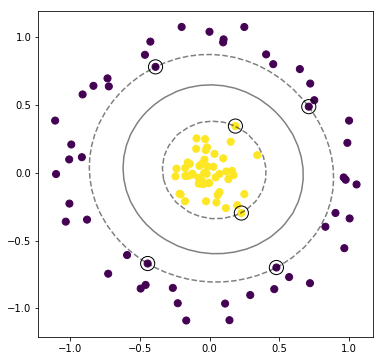

In [6]:
# SVM with RBF kernel
svRBF = SVC(kernel='rbf', C=10000)
svRBF.fit(X,y)

# plotting the margin on the SVM with the RBF kernel
plt.figure(figsize=[6,6])
plot_svm_margin(X,y,svRBF)
plt.show()

## Example: iris data with a kernel method

Recall earlier we applied an SVM to the iris data with linear boundaries. Now let's see SVMs with `rbf` and `poly` kernels. We will focus only on two of the features (sepal length and petal width) so that we can plot the decision boundaries later.

[`<IrisKernelsSVM.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisKernelSVM.py)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from DecisionBoundary import plot_svm_margin, plot_contours



# Loading the iris data
iris = datasets.load_iris()
X = iris.data[:,[0,3]]  # sepal length and petal width only
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=2018)

The data set has been split into the training and testing data sets, with the testing data comprising 40% of observations.

First, SVM with the linear kernel, and its classification performance on the testing data.

In [8]:
# SVM on training data (Linear)
svLin = SVC(kernel='linear',C=1.0)
svLin.fit(X_train,y_train)

# Predicted classes (Linear)
y_pred_Lin = svLin.predict(X_test)

# Confusion matrix (Linear)
print(confusion_matrix(y_test,y_pred_Lin))

# classification report (Linear)
print(classification_report(y_test, y_pred_Lin,
                            target_names=target_names))

[[24  0  0]
 [ 0 18  1]
 [ 0  0 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



Next, the RBF kernel.

In [9]:
# SVM on training data (RBF)
svRBF = SVC(kernel='rbf',C=1.0)
svRBF.fit(X_train,y_train)

# Predicted classes (RBF)
y_pred_RBF = svRBF.predict(X_test)

# Confusion matrix (RBF)
print(confusion_matrix(y_test,y_pred_RBF))

# classification report (RBF)
print(classification_report(y_test, y_pred_RBF,
                            target_names=target_names))

[[24  0  0]
 [ 0 19  0]
 [ 0  1 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        17

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


And finally, the polynomial kernel.

In [10]:
# SVM on training data (Polynomial)
svPoly = SVC(kernel='poly',C=1.0)
svPoly.fit(X_train,y_train)

# Predicted classes (Polynomial)
y_pred_Poly = svPoly.predict(X_test)

# Confusion matrix (Polynomial)
print(confusion_matrix(y_test,y_pred_Poly))

# classification report (Polynomial)
print(classification_report(y_test, y_pred_Poly,
                            target_names=target_names))

[[24  0  0]
 [ 0 19  0]
 [ 0  2 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.90      1.00      0.95        19
   virginica       1.00      0.88      0.94        17

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Just looking at the classifier performances doesn't seem to show the difference among these methods. So, now let's take a look at the decision boundaries (with testing data overlaid). 

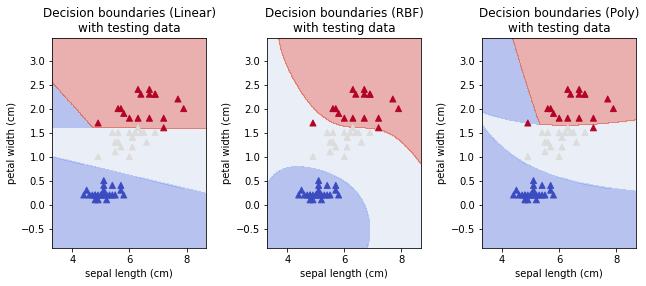

In [11]:
# plotting the boundaries and the testing data
plt.figure(figsize=[9,4])
ax = plt.subplot(131)
plot_contours(ax, svLin, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries (Linear)\nwith testing data')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(132)
plot_contours(ax, svRBF, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries (RBF)\nwith testing data')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(133)
plot_contours(ax, svPoly, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries (Poly)\nwith testing data')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

plt.subplots_adjust(wspace=0.4, bottom=0.15, left=0.075, right=0.975)
plt.show()

# 12. Cross validation
<hr style="height:1px;border:none" />

## What is cross validation?

We have used a training data set to generate a classifier and a testing data set to evaluate the performance of the resulting classifier. But how can we be sure that the classification results are consistent regardless of which training and testing data sets are used? One way to verify is to generate multiple training and testing data sets and evaluate classification performance multiple times. **Cross validation** is one such approach. In a **k-fold** cross validation, the data set is divided into k equal sizes. In the first iteration, the first of the k segments is used as the testing data set, while the remaining k-1 segments are used as the training data set. In the second iteration, the second segment is used as the testing data set. And so on. Here is a schematic of 5-fold cross validation.

<img style="width: 500px; padding: 0px;" src="https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/CV_5fold.png?raw=true" alt="5-fold cross validation"/>

As you can see, a k-fold validation enables the classification performance evaluation k times. 

## Example: iris data

Let's perform a 5-fold cross validation on the iris data. 


[`<IrisCV.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisCV.py)

In [12]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


# Loading the iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target

First, we need to define a classifier object to be examined by the cross validation. Here, we use a k nearest neighbor (kNN) classifier.

In [13]:
# defining the nearest neighbor classifier
kNN = KNeighborsClassifier(5, weights='uniform')

As for the actual cross validation, we can use the **`cross_val_score`** function in **`sklearn.model_selection`**. In `cross_val_score`, we need to provide the classifier object as an input parameter, as well as the data matrix for the features and the target variable. The number of *folds* can be specified by the parameter **`cv`**. Then `cross_val_score` splits the data into k-folds and perform a classifier analysis (building and evaluating a classifier) k times automatically. The results can be returned as the **accuracy** score. The **accuracy** is defined by the proportion of observations correctly classified, compared to all available observations. Or, in a confusion matrix, the total number of observation along the main diagonal, divided by the total number of observations in a testing data.

In [14]:
# 5-fold cross validation
scores = cross_val_score(kNN, X, y, cv=5)
print(scores)
print(scores.mean())

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


# 13. Choosing parameters for classifiers
<hr style="height:1px;border:none" />

As you have seen before, most classifiers require some sort of fine tuning of parameters to adjust for different data sets. One way to find an optimal parameter(s) is to perform cross validation with different values for the parameter, and choose the parameter that produces the best results. 

## Example: iris data

If there is just one parameter to be adjusted, then you can write a simple program to learn a classifier with different parameter values. For example, in our iris data example,

[`<IrisGridSearchKNN.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisGridSearchKNN.py)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Loading the iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


Let's say we want to use a k nearest neighbor classifier. What is the optimal value of k for our data? We can perform cross validation with different values of k, and record the mean accuracy score for each value of k. 

In [16]:
# loop over k
meanScores = []
for k in range(5,20,2):
    # defining the nearest neighbor classifier
    kNN = KNeighborsClassifier(k, weights='uniform')

    # 5-fold cross validation
    scores = cross_val_score(kNN, X, y, cv=5)
    meanScores.append(scores.mean())

And we can plot the mean score against k to see what value of k we should use.

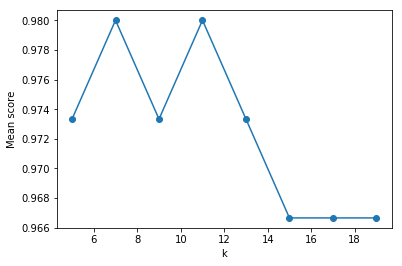

In [17]:
# plotting the mean score vs k
plt.plot(np.arange(5,20,2), meanScores, 'o-')
plt.xlabel('k')
plt.ylabel('Mean score')
plt.show()

Looks like k=7 is a good choice for this data set. You can search an optimal parameter this way.

Or, there is a tool called **`GridSearchCV`** under **`sklearn.model_selection`**. It performs cross validation for different values of parameters, and pick the best one for you. To use `GridSearchCV`, first you have to define combinations of parameter values to be examined.

In [18]:
# using a grid search
param = {'n_neighbors':list(range(5,20,2)),
         'weights':['uniform', 'distance']}

Here, possible values of parameters are stored in a *dictionary* called **`param`**. Notice that the parameter k's actual name is **`n_neighbors`**. We also need to define any other parameters that are not the default values in a classifier. In this case, we will examine **`weights`** to be either **`'uniform'`** or **`'distance'`**, just for fun. The next step is to define the classifier object.

In [19]:
kNN = KNeighborsClassifier()

Here, we don't have to worry about the parameters set in `param`. Now we have a classifier object and the parameter dictionary, we define the grid search object **`GridSearchCV`**.

In [20]:
grid_kNN = GridSearchCV(kNN, param, cv=5)
grid_kNN.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In the grid search object `GridSearchCV`, we need to provide the classifier object and the parameter dictionary. You can specify the number of folds to be used in cross validation as parameter **`cv`**. Here, we try 5-fold cross validation as before. Once the grid search object `GridSearchCV` is defined, then we use the **`fit`** to learn from the features and targets. Here, we provide the entire data set. Now let's see what the winning combination of the parameters was.

In [21]:
print(grid_kNN.best_params_)

{'n_neighbors': 11, 'weights': 'distance'}


So, this time, k=11 seems to be the winner (and `distance` weighting). And here is the mean accuracy score resulting from that combination.

In [22]:
print(grid_kNN.best_score_)

0.9866666666666667


And we can check the winning combination on another testing data set.

In [24]:
# Checking the winning combination
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=2018)
kNN = KNeighborsClassifier(7, weights='uniform')
kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[24  0  0]
 [ 0 18  1]
 [ 0  1 16]]


In [25]:
print(classification_report(y_test, y_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.95      0.95      0.95        19
   virginica       0.94      0.94      0.94        17

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



# 14. Dimension reduction with PCA
<hr style="height:1px;border:none" />

There are several unsupervised learning techniques that can be useful in reducing the dimensionality of the data. **Principal component analysis**, or **PCA**, is useful in projecting a high-dimensional data set to a lower dimensional space, a.k.a., **dimension reduction**. To demonstrate this, we shall examine the digits data set available in `Scikit-learn`. This data set contains 1797 observations of hand-written digits (0-9). Each observation is an 8x8 image of a hand-written digit, on a 16-level gray scale. Here are some examples of the digit data.

[`<DigitsPCA.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/DigitsPCA.py)

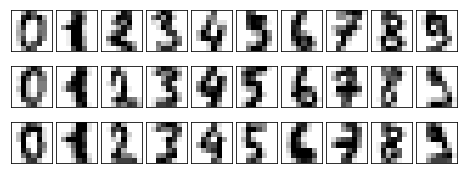

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA


# loading the digits data
digits = datasets.load_digits()
digitsX = digits.data    # the data, 1797 x 64 array
digitsImages = digits.images  # image data, 1797 x 8 x 8
digitsTargets = digits.target # target information
digitsFeatureNames = digits.target_names  # digits


# examples of the digits data
plt.figure(figsize=(8,3))
for iImg in range(3):
    for jImg in range(10):
        plt.subplot(3,10,iImg*10+jImg+1)
        plt.imshow(digitsImages[iImg*10+jImg], cmap=plt.cm.gray_r,
                   interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

Now let's run a PCA with 2 components, and plot the resulting PCs.

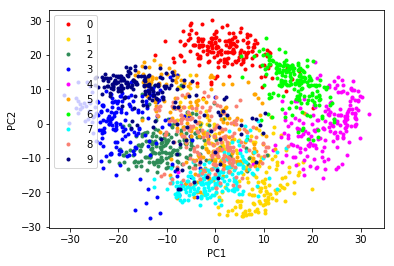

In [27]:
# PCA with largest 2 PCs
digitsPCA = PCA(n_components=2)
digitsPCs = digitsPCA.fit_transform(digitsX)


# plotting the PCs
targetColors=['red','gold','seagreen','blue','fuchsia',
              'orange','lime','cyan','salmon','navy']
for i in range(10):
    plt.plot(digitsPCs[digitsTargets==i,0],
             digitsPCs[digitsTargets==i,1],
             marker='.', ls='none', c=targetColors[i],
             label=digitsFeatureNames[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


As you can see, some digits can be separated easily from other digits (e.g., 0, 4, and 6), whereas some digits are hard to distinguish. 

Now let's take a look at the *eigenimages* corresponding to PC1 and PC2.

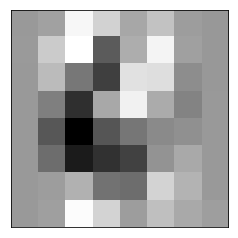

In [28]:
# PC1 eigenimage
plt.imshow(digitsPCA.components_[0,:].reshape([8,8]),cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.show()


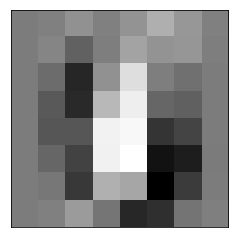

In [29]:
# PC2 eigenimage
plt.imshow(digitsPCA.components_[1,:].reshape([8,8]),cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.show()


In these eigenimages, darker pixels are the pixels contributing large variability, whereas lighter pixels contribute small variability.